In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training (75%) and validation (15%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Creating a small test set (10%)
x_test, x_small_test, y_test, y_small_test = train_test_split(x_test, y_test, test_size=0.10, random_state=42)


In [14]:

#Implement the LeNet-5 CNN:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [15]:
#Training this CNN model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))


Epoch 1/5
1329/1329 [==============================] - 34s 24ms/step - loss: 1.6726 - accuracy: 0.3922 - val_loss: 1.4946 - val_accuracy: 0.4596
Epoch 2/5
1329/1329 [==============================] - 32s 24ms/step - loss: 1.4024 - accuracy: 0.4988 - val_loss: 1.3875 - val_accuracy: 0.4987
Epoch 3/5
1329/1329 [==============================] - 29s 22ms/step - loss: 1.2874 - accuracy: 0.5436 - val_loss: 1.3133 - val_accuracy: 0.5340
Epoch 4/5
1329/1329 [==============================] - 30s 23ms/step - loss: 1.2108 - accuracy: 0.5692 - val_loss: 1.2656 - val_accuracy: 0.5517
Epoch 5/5
1329/1329 [==============================] - 30s 23ms/step - loss: 1.1497 - accuracy: 0.5931 - val_loss: 1.2690 - val_accuracy: 0.5612


In [16]:
#Evaluating for accuracy

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


282/282 [==============================] - 2s 9ms/step - loss: 1.2534 - accuracy: 0.5631
Test Accuracy: 56.31%


In [17]:
# Hyperparameter tuning (LEarning rates and epochs)
learning_rate = 0.001
epochs = 5
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/5
1329/1329 [==============================] - 35s 26ms/step - loss: 1.0945 - accuracy: 0.6120 - val_loss: 1.2380 - val_accuracy: 0.5669
Epoch 2/5
1329/1329 [==============================] - 29s 22ms/step - loss: 1.0467 - accuracy: 0.6309 - val_loss: 1.1955 - val_accuracy: 0.5856
Epoch 3/5
1329/1329 [==============================] - 32s 24ms/step - loss: 1.0137 - accuracy: 0.6409 - val_loss: 1.1982 - val_accuracy: 0.5820
Epoch 4/5
1329/1329 [==============================] - 34s 25ms/step - loss: 0.9739 - accuracy: 0.6548 - val_loss: 1.1762 - val_accuracy: 0.5977
Epoch 5/5
1329/1329 [==============================] - 32s 24ms/step - loss: 0.9417 - accuracy: 0.6694 - val_loss: 1.1761 - val_accuracy: 0.5992


282/282 [==============================] - 5s 16ms/step


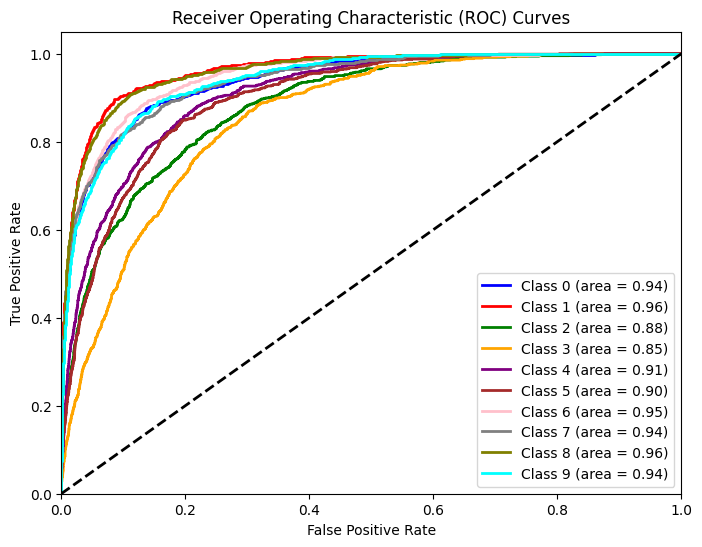

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 10

y_score = model.predict(x_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='Class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


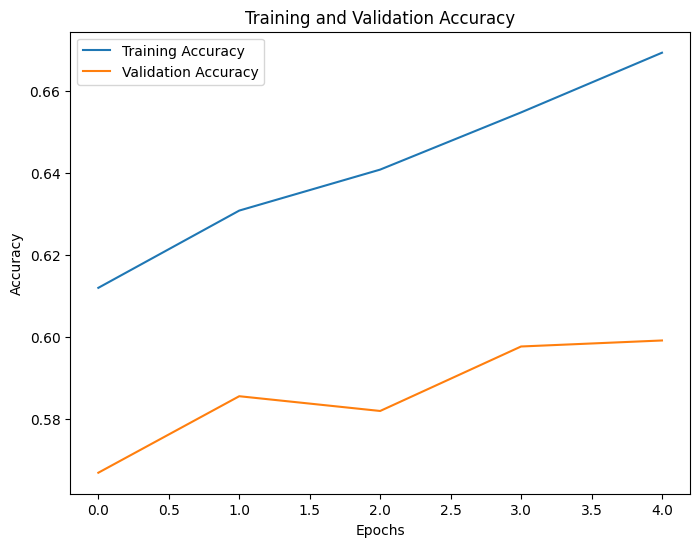

In [22]:
# Epochs vs Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


282/282 [==============================] - 4s 13ms/step


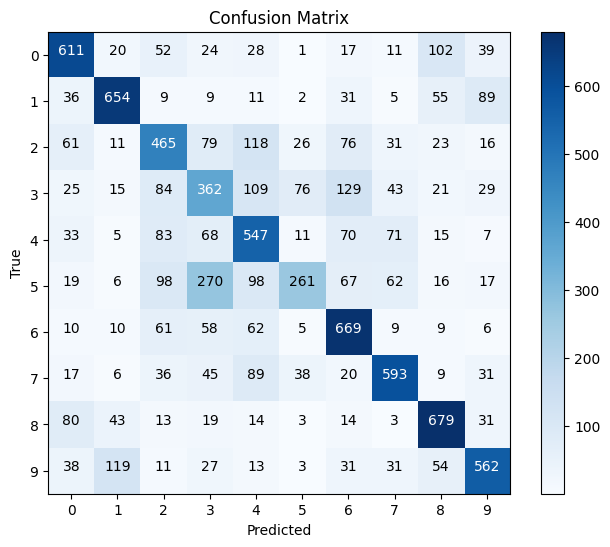

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Confusion Matrix

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Confusion Matrix')
plt.colorbar()

classes = [str(i) for i in range(10)]  # Assuming there are 10 classes
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


